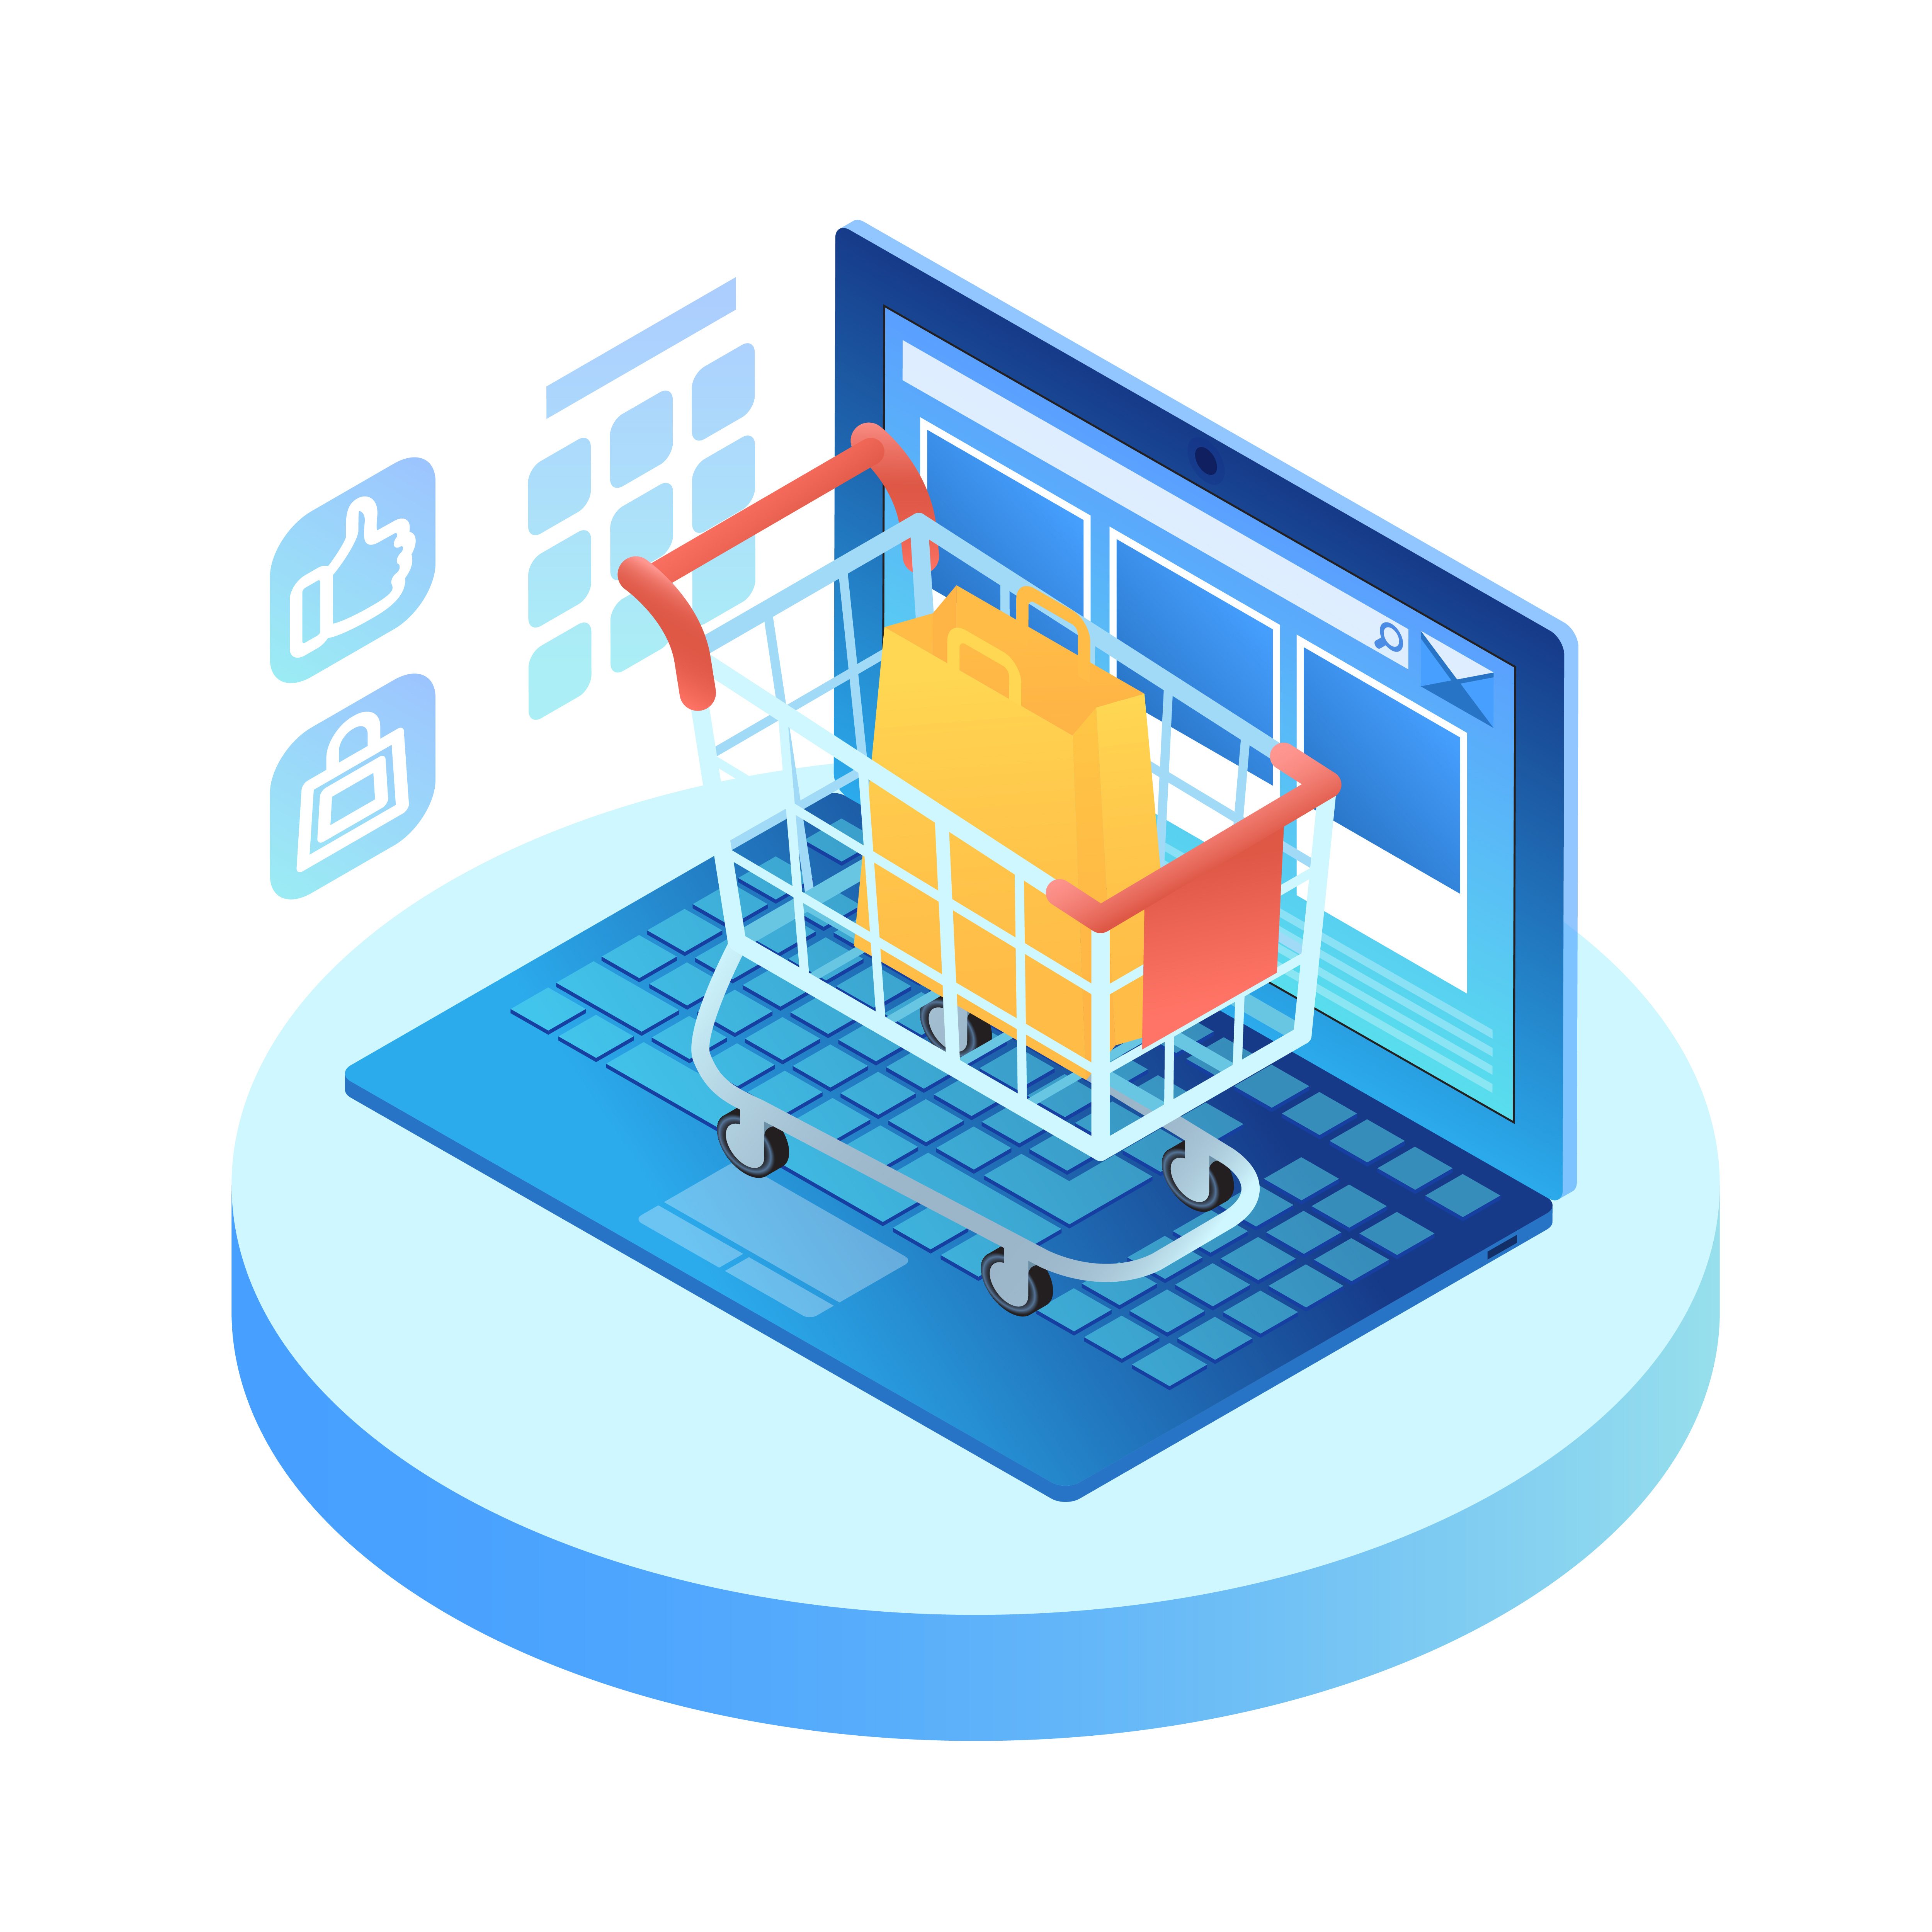

**O enunciado deste projeto a seguir é completamente fictício.**

#**ALEGRIA FESTAS SA**
 
*É uma empresa situada no Reino Unido, com modelo de negócio em E-commerce onde vendem online  principalmente artigos de presente exclusivos para todos os ocasiões. Muitos clientes da empresa são atacadistas.*

##**Problema de negócio:**

*A equipe de marketing da "Alegria Festas SA", deseja encontrar clientes significativos para a empresa, que fazem grandes compras de seus produtos favoritos. A organização deseja lançar um programa de fidelidade para os clientes de alto valor após a identificação dos mesmos.*
 
*Más o time de marketing não tem conhecimento em análises avançadas de dados, então foi solicitado ao time de dados a resolução deste problema.*

##**Desafio:**

*Eric faz parte do time de cientistas de dados da empresa "Alegria Festas SA", que precisa determinar quem são os clientes elegíveis para participar do programa de fidelidade.*
 
*Em posse dessa lista, o time de Marketing fará uma sequência de ações personalizadas e exclusivas ao grupo, de forma a aumentar o faturamento e a frequência de compra.*
 
*Como resultado para esse projeto, é esperado que Eric entregue uma lista de pessoas elegíveis a participar do programa de fidelidade, junto com um relatório respondendo às seguintes perguntas:*
 

1 - Quem são as pessoas elegíveis para participar do programa ?
 
2 - Quantos clientes farão parte do grupo?
 
3 - Quais as principais características desses clientes ?
 
4 - Qual a porcentagem de contribuição do faturamento, vinda destes clientes ?
 
5 - Qual a expectativa de faturamento desse grupo para os próximos meses ?
 
6 - Quais as condições para uma pessoa ser elegível ao programa ?
 
7  - Quais as condições para uma pessoa ser removida do programa ?
 
8 - Qual a garantia que o programa criado é melhor que o restante da base ?
 
9 - Quais ações o time de marketing pode realizar para aumentar o faturamento?

##**Roteiro da solução:**

*1 - Explorar os dados, verificar inconsistências, estatísticas descritivas, e verificar a possibilidade de possíveis tratamentos de dados.*
 
*2 - Levantar hipóteses sobre os melhores clientes, e testar a veracidade das conclusões com dados.*

##**Dicionário de dados:**
 
*Este conjunto de dados do Varejo Online II contém todas as transações ocorridas para um varejo on-line registrado e não registrado no Reino Unido entre 01/12/2009 e 09/12 / 2011.*

**InvoiceNo:** Número da fatura. Nominal. Um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se este código começar com a letra 'c', isso indica um cancelamento.
 
**StockCode:** código do produto (item). Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto.
 
**Description:** Nome do produto (item). Nominal.
 
**Quantity:** as quantidades de cada produto (item) por transação. Numérico.
 
**InvoiceDate:** data e hora do inventário. Numérico. O dia e a hora em que uma transação foi gerada.
 
**UnitPrice:** preço unitário. Numérico. Preço do produto por unidade em libras esterlinas (£).
 
**CustomerID:** Número do cliente. Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada cliente.
 
**Country:** nome do país. Nominal. O nome do país onde o cliente reside.

**Reconhecimentos:**
Extraído de http://archive.ics.uci.edu/ml/datasets/Online+Retail+II .
Conjunto de dados fornecido pelo Dr. Daqing Chen, Diretor do Curso: MSc Data Science. chend '@' lsbu.ac.uk, Escola de Engenharia, London South Bank University, London SE1 0AA, UK.

#**Caixa de ferramentas:**

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# manipulação de tabelas
import pandas as pd
 
# Álgebra linear
import numpy  as np
 
# leitor de arquivos Zip
import zipfile
 
# Visualizações de dados
import seaborn as sns
import matplotlib.pyplot as plt
 
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
 
# Pausa de notificação
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [56]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


**Funções:**

In [57]:
 # Função que retorna a dimensão da base de dados
def data_dimension (df):
    print(".....Dimensão dos dados.....")
    print("Número de linhas: {}".format(df.shape[0]))
    print("Número de colunas: {}".format(df.shape[1]))
    return None
 
# Função para exibir os tipos de dados do dataset 
def data_info (df):
    print(".....Informações sobre os tipos de dados.....")
    df = df.info()
    return None
 
# Função para verificar dados nulos no dataset 
def data_check_null (df):
    df = df.isnull().sum()
    return df
 
# Função para verificar dados duplicados 
def check_duplicated (df):
    df = df.duplicated().sum()
    return df
 
#  Função para gerar estatísticas descritivas dos dados
def data_describe (df):
    df = df.describe(include="all") # visão de dados numéricos e categóricos  
    return df

#**Extração**

In [58]:
# Leitura 1° arquivo zip
zf1 = zipfile.ZipFile("/content/drive/MyDrive/online_retail_09_10.csv.zip")
varejo_2010 = pd.read_csv(zf1.open(zipfile.ZipFile.namelist(zf1)[0]),parse_dates=["InvoiceDate"])
 
# Leitura 2° arquivo zip
zf2 = zipfile.ZipFile("/content/drive/MyDrive/online_retail_10_11.csv.zip")
varejo_2011 = pd.read_csv(zf2.open(zipfile.ZipFile.namelist(zf2)[0]),parse_dates=["InvoiceDate"])

#**Transformação**

In [59]:
# Verificando dimensão da base
data_dimension(varejo_2010)
data_dimension(varejo_2011)

.....Dimensão dos dados.....
Número de linhas: 525461
Número de colunas: 8
.....Dimensão dos dados.....
Número de linhas: 541910
Número de colunas: 8


In [60]:
# Unindo as bases de dados
varejo_all = pd.concat([varejo_2010,varejo_2011],axis=0)

In [61]:
data_dimension(varejo_all)

.....Dimensão dos dados.....
Número de linhas: 1067371
Número de colunas: 8


In [62]:
# Verificando a tabela registro mínimos
varejo_all.min()

InvoiceNo                   489434
StockCode                    10002
Quantity                    -80995
InvoiceDate    2009-12-01 07:45:00
UnitPrice                 -53594.4
CustomerID                   12346
Country                  Australia
dtype: object

In [63]:
# Verificando a tabela registros máximos
varejo_all.max()

InvoiceNo                  C581569
StockCode                        m
Quantity                     80995
InvoiceDate    2011-12-09 12:50:00
UnitPrice                    38970
CustomerID                   18287
Country                West Indies
dtype: object

In [64]:

# tipos de dados
data_info(varejo_all)

.....Informações sobre os tipos de dados.....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   UnitPrice    1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


*A base contêm 3 atributos numéricos e 4 categóricos e 1 de data*

In [65]:

# Verificando valores nulos 
data_check_null(varejo_all)

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

*A base contêm valores nulos nas colunas; Identificador do cliente onde (243.007) e Descrição (4382)*

*Vou excluir estes dados vazios na base, pois verificando a lógica eu não poderei completar as descrições dos produtos, sem saber na realidade qual produto verdadeiramente pertencia aquela compra. E também não posso submeter um Id de consumidor sendo que não será verdadeiro, podendo ser um valor falso quanto a uma entidade física. Por estes motivos irei excluír todas linhas com valores nulos.*

In [66]:
# excluindo valores nulos
varejo_all.dropna(axis=0,inplace=True)

In [67]:
# tamanho da base após exclusão
data_dimension(varejo_all)

.....Dimensão dos dados.....
Número de linhas: 824364
Número de colunas: 8


In [68]:
data_check_null(varejo_all)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Valores nulos, solucionados !

In [69]:

# Verificando valores duplicados 
check_duplicated(varejo_all)

26479

*A base de dados contêm 26.479 campos com dados duplicados (atributos repetidos)*

In [70]:
varejo_all.loc[(varejo_all.duplicated() ==True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


*Numéros de faturas e datas iguais, mas as compras e preços dos produtos são diferentes, logo a minha decisão é de não excluir estes dados, pois para mim são homogêneos e podem me informar possíveis insights sobre os clientes*

**Estatística descritiva**

In [71]:
data_describe(varejo_all)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,824364,824364,824364,824364.000000,824364,824364.000000,824364.000000,824364
unique,44876,4646,5299,NaN,41439,NaN,NaN,41
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542,5322,5315,NaN,543,NaN,NaN,741301
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.414574,NaN,3.676800,15324.638504,NaN
std,NaN,NaN,NaN,188.976099,NaN,70.241388,1697.464450,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13975.000000,NaN


▪O número da fatura mais frequente é 576339.
 
▪O código de produto mais frequente é 85123A. 
 
▪O produto mais comprado é WHITE HANGING HEART T-LIGHT HOLDER (SUPORTE DE LUZ T DE CORAÇÃO PENDURADO BRANCO). Há 5299 produtos únicos.
 
▪Em média são comprados 12 produtos por compra. E os valores máximos e mínimos de compra apresentam inconsistências, pois um cliente comprar 80995 produtos tanto positivo como negativo, é uma ação extremamente difícil. Acredito que seja erro de imputação dos dados em tempo de execução do sistema no e-commerce.

▪O preço mínimo de compra é  0, pode ser um valor inconsistênte, o valor máximo 38.970, a média é 3.67. Enfim apresenta valores suspeitos a uma análise mais minuciosa.
 
▪A data e hora mais frequente de compras é 2011-11-14 15:27:00, onde em 41439 das vezes foram em horários diferentes.
 
▪ Há 41 países diferentes por compras, onde o mais frequente é o Reino Unido, aparecendo 741.301 das vezes.

**Verificando outliers**

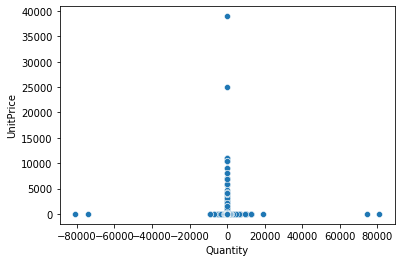

In [72]:
sns.scatterplot(x=varejo_all["Quantity"], y=varejo_all["UnitPrice"]);

É percetível alguns valores muitos dispersos e inconsistências entre quantidades de produtos e preços unitários.

**Problemas com quantidade de produto por compra**

In [73]:
varejo_all.loc[varejo_all["Quantity"] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Compreendi que estes valores negativos estão errados, mais não irei exclui-los pois representam o número de produtos por compra.

In [74]:
# seleciona todas linhas com quantidades de produtos menores ou iguais a zero
varejo_all["Quantity"] = abs(varejo_all["Quantity"])

In [75]:
# Trato o valores negativos, transformando-os em valores absolutos
varejo_all.loc[varejo_all["Quantity"] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Problema com dados negativos resolvido

**Problemas com quantidades grandes de produtos por compra**

In [76]:
# top 10 números de produtos por compra
varejo_all["Quantity"].nlargest(10)

540421    80995
540422    80995
61619     74215
61624     74215
90857     19152
127166    12960
127168    12960
127169    12744
502122    12540
127167    12480
Name: Quantity, dtype: int64

In [77]:
# Trato o valores negativos, transformando-os em valores absolutos
poda = varejo_all.loc[varejo_all["Quantity"] >= 19152].index
varejo_all.drop(poda, inplace=True)

In [78]:
varejo_all.loc[varejo_all["Quantity"] >= 19152]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Problemas com outliers em relação a quantidade de produtos por compra solucionados.

**Problemas com preço**

In [79]:
varejo_all[varejo_all["UnitPrice"] <=0].describe()

,Quantity,UnitPrice,CustomerID
count,71.000000,71.0,71.000000
mean,207.802817,0.0,14211.802817
std,1487.153922,0.0,1694.734683
min,1.000000,0.0,12415.000000
25%,1.000000,0.0,12697.500000
50%,5.000000,0.0,13985.000000
75%,12.000000,0.0,15088.500000
max,12540.000000,0.0,18071.000000


Pelo que compreendo analisando a estatística descritiva dos preços unitários onde são valores iguais a zero, foram inputados incorretamente. São 71 registros,12540 produtos ao máximo, logo não faz sentido ter custos iguais a zero, por este motivo irei excluir a linhas com estes valores, pois são poucos relevantes.

In [80]:
varejo_all["UnitPrice"].nlargest(20)

222681    38970.00
241824    25111.09
135012    10953.50
135013    10953.50
135014    10953.50
342135    10468.80
358639    10468.80
372833    10468.80
74356      8985.60
74357      8985.60
173277     8142.75
173382     8142.75
374183     7044.79
129902     6958.17
129903     6958.17
129987     6958.17
129988     6958.17
173391     6930.00
169510     5876.34
159927     5843.70
Name: UnitPrice, dtype: float64

In [81]:
varejo_all.loc[[222681,241824]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,511035,48194,DOOR MAT HEARTS,4,2010-06-06 10:57:00,7.49,16242.0,United Kingdom
222681,C556445,M,Manual,1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
241824,C512770,M,Manual,1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom


E verificando as top 20 compras, percebo dois valores bastante distantes do padrão e em destaque essas compras foram descritas manualmente, logo podem ter sido erro de escrita do vendedor. Possívelmente irei retiralos quando aplicar a modelagem, pois o algoritmo de agrupamento como trabalha com cálculos de distância sofrerá com esses valores.

In [82]:
zeros = varejo_all[(varejo_all["UnitPrice"] <=0 )].index
varejo_all.drop(zeros, inplace=True)
varejo_all.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [83]:
 varejo_all[varejo_all["UnitPrice"] <=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Problema com preços iguais a zero resolvido.

**Problemas com outlier**

In [84]:
varejo_all["UnitPrice"].nlargest(2)

222681    38970.00
241824    25111.09
Name: UnitPrice, dtype: float64

In [85]:
 varejo_all["UnitPrice"].mean()

3.6738596941693547

Perceptível que os valores do preço unitário 38.970,00 e 25.111,09 estão bastantes distantes da média, para não correr o risco de maiores complicações de informações distorcidas irei removelos.

In [86]:
outlier = varejo_all[varejo_all["UnitPrice"] >=25111].index
varejo_all.drop(outlier,inplace=True)
varejo_all.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [87]:
varejo_all[varejo_all["UnitPrice"] >=25111]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


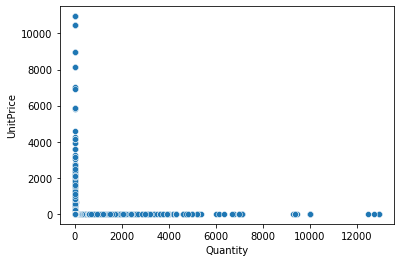

In [88]:
sns.scatterplot(x=varejo_all["Quantity"], y=varejo_all["UnitPrice"]);

Problemas com valores discrepantes resolvidos

#**Engenharia de atributos**

*Para saber o custo total por compra de determinado produto é necessário multiplicar a quantidade de produtos pelo preço unitário.*

In [89]:
# Criei uma nova coluna com o valor total de preço pago por quantidades de produtos
varejo_all.insert(loc=6, column="TotalPrice", value=varejo_all['Quantity'] * varejo_all['UnitPrice'])

In [90]:
varejo_all.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,83.4,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,81.0,13085.0,United Kingdom


*Extração de datas por dia, mês e ano*

In [91]:
varejo_all.insert(loc=5, column="Day",  value=varejo_all["InvoiceDate"].dt.day)
varejo_all.insert(loc=6, column="Month", value=varejo_all["InvoiceDate"].dt.month)
varejo_all.insert(loc=7, column="Year", value=varejo_all["InvoiceDate"].dt.year)

In [92]:
varejo_all.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day,Month,Year,UnitPrice,TotalPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,1,12,2009,6.95,83.4,13085.0,United Kingdom


In [93]:
data_info(varejo_all)

.....Informações sobre os tipos de dados.....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 824225 entries, 0 to 541909
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    824225 non-null  object        
 1   StockCode    824225 non-null  object        
 2   Description  824225 non-null  object        
 3   Quantity     824225 non-null  int64         
 4   InvoiceDate  824225 non-null  datetime64[ns]
 5   Day          824225 non-null  int64         
 6   Month        824225 non-null  int64         
 7   Year         824225 non-null  int64         
 8   UnitPrice    824225 non-null  float64       
 9   TotalPrice   824225 non-null  float64       
 10  CustomerID   824225 non-null  float64       
 11  Country      824225 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 81.7+ MB


*O uso de memória das variáveis está alto, irei tentar reduzir mudando as naturezas dos atributos, datas e/ou dados categorizados*

In [94]:
categ = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
for c in categ:
   varejo_all[c] = varejo_all[c].astype("category")

In [95]:
data_info(varejo_all)

.....Informações sobre os tipos de dados.....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 824225 entries, 0 to 541909
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    824225 non-null  category      
 1   StockCode    824225 non-null  category      
 2   Description  824225 non-null  category      
 3   Quantity     824225 non-null  int64         
 4   InvoiceDate  824225 non-null  datetime64[ns]
 5   Day          824225 non-null  int64         
 6   Month        824225 non-null  int64         
 7   Year         824225 non-null  int64         
 8   UnitPrice    824225 non-null  float64       
 9   TotalPrice   824225 non-null  float64       
 10  CustomerID   824225 non-null  category      
 11  Country      824225 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(2), int64(4)
memory usage: 61.1 MB


#**Exploração dos dados**

###**Aqui neste espaço Eric com sua curiosidade minera os dados em busca de informações interessantes sobre o consumidor do Alegrias Festas SA.**

**Quantos clientes há na base de dados depois dos dados tratados ?**

In [96]:
varejo_all["CustomerID"].unique ()

[13085.0, 13078.0, 15362.0, 18102.0, 12682.0, ..., 15195.0, 13436.0, 15520.0, 13298.0, 12713.0]
Length: 5938
Categories (5938, float64): [13085.0, 13078.0, 15362.0, 18102.0, ..., 13436.0, 15520.0, 13298.0,
                             12713.0]

Restaram 5938 consumidores na base.

**Quais são os tipos de produtos mais consumidos ?**

In [97]:
varejo_all["Description"].unique()

['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS', ' WHITE CHERRY LIGHTS', 'RECORD FRAME 7" SINGLE SIZE ', 'STRAWBERRY CERAMIC TRINKET BOX', ..., 'SET OF 6 RIBBONS PERFECTLY PRETTY  ', 'GIN AND TONIC DIET METAL SIGN', 'SET OF 6 RIBBONS PARTY', 'SILVER AND BLACK ORBIT NECKLACE', 'CREAM HANGING HEART T-LIGHT HOLDER']
Length: 5298
Categories (5298, object): ['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS', ' WHITE CHERRY LIGHTS',
                            'RECORD FRAME 7" SINGLE SIZE ', ..., 'GIN AND TONIC DIET METAL SIGN',
                            'SET OF 6 RIBBONS PARTY', 'SILVER AND BLACK ORBIT NECKLACE',
                            'CREAM HANGING HEART T-LIGHT HOLDER']

Primeiramente temos 5298 produtos diferentes no portfólio do e-commerce, logo é custoso informar um rank de forma visual, este problema é melhor resolvido em uma tabela relacional. Vou selecionar os top 20 produtos e representar em um gráfico.

In [98]:
top20_prod = varejo_all["Description"].value_counts().to_frame().reset_index().nlargest(20,"Description")

In [99]:
top20_prod

,index,Description
0,WHITE HANGING HEART T-LIGHT HOLDER,5315
1,REGENCY CAKESTAND 3 TIER,3775
2,ASSORTED COLOUR BIRD ORNAMENT,2794
3,JUMBO BAG RED RETROSPOT,2776
4,LUNCH BAG BLACK SKULL.,2161
5,REX CASH+CARRY JUMBO SHOPPER,2150
6,PARTY BUNTING,2143
7,STRAWBERRY CERAMIC TRINKET BOX,2106
8,POSTAGE,2019
9,BAKING SET 9 PIECE RETROSPOT,1976


In [100]:
fig = px.bar(x= top20_prod["index"], y=top20_prod["Description"], color=top20_prod["Description"],title="Top 20 Produtos mais consumidos no portfólio (Alegrias Festas SA)")
fig.show()

**Quais os clientes que adquirem mais produtos ?**

In [101]:
quant = varejo_all[["CustomerID","Quantity"]].groupby("CustomerID").agg({"Quantity":"sum"}).reset_index()
quant.head()

,CustomerID,Quantity
0,12346.0,88
1,12347.0,3286
2,12348.0,2714
3,12349.0,1629
4,12350.0,197


In [102]:
fig = px.treemap(quant, path=["CustomerID"], values="Quantity", title='Quantidade de produtos comprados por cliente')
fig.show();

# **CARGA**

In [105]:
# exportando dados tratados para o disco
varejo_all.to_csv("dados_tratado.csv",index=False)